In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sklearn
import tensorflow as tf

In [2]:
root_path = os.getcwd()
parent_path = os.path.dirname(root_path)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
## For Notebook
# root_directory = 'C:/git/explic-ai-tsc'    

## For PC
root_directory = 'D:/git/explic-ai-tsc'

In [3]:
from utils.utils import read_all_datasets
from utils.utils import shape_data
from utils.constants import DATASETS_NAMES

## Load Data sets

In [4]:
dataset_dict = read_all_datasets(root_directory, 'UCRArchive_2018')

curr_dataset = 'ECG5000'

x_train, y_train, x_test, y_test, y_true, nb_classes, input_shape = shape_data(dataset_dict[curr_dataset])

## Load Pretrained Model (MLP)

In [5]:
from classifiers import MLP

In [6]:
## For PC
root_directory = 'D:/git/explic-ai-tsc'

output_directory_model = root_directory + '/results/MLP/UCRArchive_2018_itr_0/ECG5000/'
model = MLP(output_directory_model, input_shape, nb_classes, verbose=True, build=False)

## Load Explanation Method

In [7]:
from utils.utils import read_all_datasets
from explanations import OcclusionSensitivityUTS
from explanations import MeaningfulPerturbationUTS
from explanations import LimeUTS
from explanations import RiseUTS
from explanations import AnchorUTS

In [8]:
data2explain = x_test[:50]
ytrue4data2explain = y_true[:50]

In [9]:
explainer_occl = OcclusionSensitivityUTS()
relevance4data_occl_zero = explainer_occl.explain(data2explain, ytrue4data2explain, model)
relevance4data_occl_mean = explainer_occl.explain(data2explain, ytrue4data2explain, model, perturbation='mean')

In [10]:
explainer_rise = RiseUTS()
relevance4data_rise_fourier = explainer_rise.explain(data2explain, ytrue4data2explain, model)
print('relevance4data_rise_fourier')
print(relevance4data_rise_fourier.shape)
print(relevance4data_rise_fourier[0])

y_true
0

saliency
(140,)
[0.92985202 0.93719556 0.94443767 0.95139944 0.95790735 0.96379738
 0.96891897 0.97313872 0.97634368 0.97844428 0.97937664 0.97910449
 0.97762017 0.9749453  0.9711305  0.9662546  0.96042305 0.95376581
 0.94643448 0.93859913 0.9304444  0.92216538 0.91396317 0.90604025
 0.89859567 0.89182053 0.88589327 0.88097542 0.87720765 0.8747063
 0.87356024 0.87382871 0.87553941 0.87868756 0.88323567 0.88911397
 0.89622158 0.90442858 0.91357848 0.92349164 0.93396895 0.94479615
 0.95574855 0.96659593 0.97710762 0.98705777 0.99623032 1.004424
 1.01145691 1.01717082 1.02143483 1.02414853 1.02524451 1.02469016
 1.02248871 1.01867941 1.01333707 1.0065707  0.99852142 0.98935975
 0.97928213 0.96850692 0.95726997 0.9458197  0.93441197 0.9233048
 0.91275297 0.90300278 0.89428684 0.88681941 0.88079193 0.87636903
 0.87368531 0.8728426  0.87390803 0.87691272 0.88185141 0.88868267
 0.89733005 0.90768381 0.91960345 0.93292076 0.94744351 0.96295957
 0.97924132 0.99605048 1.01314298 1.0302

y_true
0

saliency
(140,)
[0.82544834 0.8279756  0.82880834 0.82796723 0.82549943 0.82147765
 0.81599888 0.80918256 0.80116845 0.79211415 0.78219228 0.77158752
 0.76049327 0.74910833 0.73763346 0.7262679  0.71520597 0.70463378
 0.69472611 0.68564353 0.67752966 0.67050909 0.66468524 0.66013898
 0.6569274  0.65508322 0.65461449 0.65550489 0.65771424 0.66117972
 0.66581719 0.67152314 0.67817677 0.68564237 0.69377207 0.70240865
 0.71138846 0.72054446 0.72970932 0.73871832 0.74741229 0.75564036
 0.76326247 0.77015172 0.77619632 0.7813014  0.7853903  0.78840564
 0.79031001 0.79108622 0.79073725 0.78928591 0.78677397 0.78326122
 0.77882404 0.77355391 0.76755547 0.76094463 0.75384648 0.74639297
 0.73872074 0.73096885 0.72327649 0.71578082 0.70861502 0.70190616
 0.69577362 0.69032743 0.68566687 0.68187937 0.67903955 0.67720846
 0.6764332  0.67674658 0.67816703 0.68069893 0.68433276 0.68904561
 0.69480194 0.70155422 0.70924384 0.71780207 0.72715101 0.73720466
 0.74786999 0.75904795 0.7706346  0.

y_true
0

saliency
(140,)
[1.03646452 1.03527779 1.03368806 1.03170508 1.02934036 1.02660724
 1.023521   1.02009882 1.01635995 1.01232565 1.00801941 1.00346681
 0.99869563 0.99373577 0.98861913 0.98337955 0.97805253 0.97267507
 0.96728526 0.96192197 0.95662442 0.95143169 0.94638218 0.94151309
 0.93685986 0.93245546 0.92832994 0.92450971 0.92101718 0.91786998
 0.91508074 0.9126566  0.9105989  0.90890306 0.90755836 0.90654802
 0.90584938 0.90543403 0.9052683  0.90531371 0.90552755 0.90586365
 0.90627316 0.90670547 0.90710913 0.90743297 0.907627   0.90764354
 0.9074383  0.90697135 0.90620807 0.90512    0.90368574 0.90189145
 0.89973152 0.89720891 0.89433534 0.89113139 0.88762635 0.883858
 0.87987203 0.87572147 0.87146591 0.8671705  0.8629049  0.85874213
 0.85475715 0.85102568 0.84762266 0.84462092 0.84208975 0.84009352
 0.83869037 0.83793104 0.83785777 0.83850326 0.83989005 0.84202971
 0.84492253 0.84855732 0.85291126 0.8579502  0.86362906 0.86989239
 0.87667513 0.88390372 0.89149713 0.89

y_true
0

saliency
(140,)
[1.00951629 1.01518124 1.02023347 1.02456743 1.02809349 1.03073934
 1.0324512  1.03319433 1.0329533  1.03173172 1.02955161 1.02645236
 1.02248918 1.01773153 1.01226095 1.00616889 0.99955422 0.99252077
 0.98517473 0.97762211 0.96996627 0.96230562 0.95473147 0.94732615
 0.94016146 0.9332973  0.92678084 0.92064587 0.91491264 0.90958802
 0.90466601 0.90012862 0.89594698 0.89208289 0.88849031 0.88511734
 0.88190812 0.87880492 0.87575012 0.87268832 0.86956817 0.86634421
 0.86297843 0.85944158 0.85571429 0.85178783 0.84766453 0.84335793
 0.83889256 0.83430338 0.82963493 0.82494017 0.82027911 0.81571713
 0.8113232  0.80716799 0.80332176 0.79985242 0.79682348 0.7942922
 0.79230776 0.79090972 0.79012669 0.78997527 0.79045925 0.79156925
 0.79328258 0.79556358 0.79836418 0.80162495 0.80527629 0.8092401
 0.81343153 0.81776106 0.8221368  0.82646658 0.83066057 0.83463341
 0.83830664 0.84161077 0.84448734 0.84689053 0.84878871 0.85016549
 0.85102052 0.85136983 0.85124585 0.85

y_true
0

saliency
(140,)
[0.95027995 0.95029745 0.95000592 0.94942263 0.94856939 0.94747218
 0.9461609  0.94466892 0.94303265 0.94129094 0.93948464 0.9376559
 0.93584757 0.93410251 0.93246296 0.93096988 0.92966216 0.92857616
 0.92774491 0.92719764 0.92695924 0.92704973 0.92748388 0.92827097
 0.92941435 0.93091148 0.93275376 0.93492653 0.93740928 0.94017579
 0.94319447 0.94642879 0.94983768 0.95337623 0.95699613 0.96064656
 0.9642748  0.96782707 0.97124934 0.97448816 0.97749142 0.98020928
 0.98259481 0.98460491 0.98620089 0.98734913 0.98802165 0.98819665
 0.98785883 0.98699965 0.98561768 0.98371853 0.9813149  0.97842643
 0.97507948 0.97130678 0.967147   0.96264421 0.95784734 0.95280936
 0.9475867  0.94223831 0.93682495 0.93140826 0.9260499  0.9208107
 0.91574985 0.91092395 0.90638641 0.90218654 0.89836905 0.89497328
 0.89203291 0.88957528 0.88762134 0.88618514 0.88527391 0.88488794
 0.88502061 0.88565864 0.88678233 0.88836584 0.89037767 0.89278115
 0.89553502 0.89859405 0.90190963 0.90

y_true
0

saliency
(140,)
[0.88177257 0.88723929 0.89164064 0.8949181  0.89702618 0.89793368
 0.89762471 0.89609962 0.8933755  0.8894866  0.88448422 0.87843653
 0.87142788 0.86355795 0.85494038 0.84570131 0.83597756 0.82591446
 0.81566361 0.80538039 0.79522132 0.78534137 0.77589119 0.76701445
 0.75884512 0.75150507 0.74510156 0.73972537 0.73544884 0.73232441
 0.73038357 0.72963603 0.7300695  0.7316497  0.73432102 0.73800733
 0.74261355 0.7480272  0.75412073 0.76075381 0.76777624 0.77503065
 0.78235586 0.78958998 0.79657368 0.80315343 0.80918471 0.81453489
 0.81908613 0.82273779 0.82540862 0.82703856 0.82759015 0.82704943
 0.82542639 0.82275502 0.81909281 0.81451971 0.80913681 0.80306445
 0.79643994 0.78941499 0.78215284 0.77482511 0.7676084  0.76068095
 0.75421913 0.74839398 0.74336776 0.73929089 0.73629881 0.73450934
 0.7340203  0.73490744 0.73722295 0.74099421 0.74622322 0.75288632
 0.76093446 0.77029404 0.780868   0.79253752 0.80516399 0.81859138
 0.83264896 0.84715408 0.86191542 0.

y_true
0

saliency
(140,)
[0.78087751 0.77745603 0.77475417 0.77280865 0.77164268 0.77126565
 0.771673   0.77284646 0.77475439 0.77735258 0.78058514 0.78438567
 0.78867852 0.79338033 0.7984016  0.80364835 0.80902385 0.81443037
 0.81977085 0.82495059 0.82987876 0.83446992 0.83864522 0.84233357
 0.84547262 0.84800948 0.84990128 0.85111549 0.8516301  0.85143357
 0.85052455 0.84891148 0.84661207 0.84365256 0.84006691 0.83589596
 0.83118639 0.82598984 0.82036183 0.81436088 0.80804742 0.80148312
 0.79472984 0.78784911 0.78090147 0.77394587 0.76703936 0.76023679
 0.7535906  0.74715076 0.74096477 0.73507777 0.72953262 0.72437015
 0.71962935 0.71534761 0.71156088 0.70830391 0.70561036 0.70351286
 0.70204304 0.70123145 0.70110736 0.70169852 0.70303081 0.70512778
 0.70801015 0.71169518 0.71619607 0.72152119 0.72767352 0.73464973
 0.74243967 0.75102569 0.76038201 0.77047433 0.78125945 0.792685
 0.80468951 0.81720233 0.83014406 0.84342697 0.85695565 0.87062789
 0.88433564 0.89796632 0.91140405 0.92

y_true
0

saliency
(140,)
[1.04798832 1.04942065 1.04927516 1.04756482 1.04432439 1.0396102
 1.03349949 1.02608944 1.01749572 1.00785085 0.99730206 0.986009
 0.97414106 0.96187459 0.94938997 0.93686841 0.92448894 0.91242522
 0.90084252 0.88989482 0.87972208 0.87044773 0.86217655 0.85499285
 0.84895885 0.84411386 0.84047345 0.83802942 0.83675006 0.83658078
 0.83744545 0.83924788 0.84187383 0.84519333 0.84906334 0.85333062
 0.85783485 0.8624118  0.86689669 0.87112745 0.87494804 0.87821151
 0.88078299 0.8825424  0.8833869  0.88323287 0.88201772 0.87970114
 0.87626591 0.8717183  0.86608809 0.85942795 0.85181252 0.84333705
 0.83411555 0.82427877 0.81397165 0.80335066 0.79258092 0.78183307
 0.77128018 0.76109455 0.75144457 0.7424917  0.73438753 0.72727114
 0.72126667 0.71648122 0.71300292 0.7108997  0.7102181  0.71098274
 0.71319592 0.71683796 0.72186765 0.7282232  0.73582348 0.74456967
 0.75434706 0.76502712 0.77646986 0.78852623 0.80104052 0.8138531
 0.82680278 0.83972945 0.85247634 0.8648

y_true
0

saliency
(140,)
[1.05637266 1.05499783 1.05095942 1.04434163 1.03526194 1.02386888
 1.01033932 0.99487543 0.97770113 0.95905846 0.93920365 0.91840304
 0.89692898 0.87505579 0.8530556  0.83119459 0.80972924 0.78890296
 0.76894293 0.75005742 0.73243331 0.71623427 0.70159918 0.68864099
 0.67744622 0.66807465 0.66055961 0.65490858 0.6511042  0.64910559
 0.64885001 0.65025471 0.65321909 0.65762692 0.66334873 0.67024429
 0.67816513 0.68695687 0.69646177 0.70652094 0.71697662 0.72767413
 0.7384637  0.74920225 0.75975471 0.76999537 0.77980877 0.78909067
 0.79774853 0.80570197 0.81288303 0.81923618 0.82471826 0.82929829
 0.83295712 0.83568704 0.83749133 0.83838358 0.83838735 0.83753536
 0.83586898 0.83343754 0.83029776 0.82651306 0.82215299 0.8172925
 0.81201141 0.80639367 0.80052671 0.79450074 0.78840806 0.78234216
 0.77639706 0.77066628 0.76524204 0.76021418 0.75566922 0.75168919
 0.74835056 0.74572312 0.74386882 0.74284059 0.74268131 0.74342262
 0.74508409 0.74767226 0.75117985 0.7

## Qualtitative analysis of relevance vectors

In [11]:
from utils.utils import plot_relevance

Zero occlusion


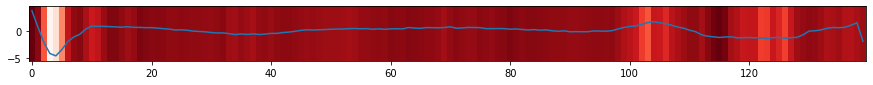

Mean occlusion


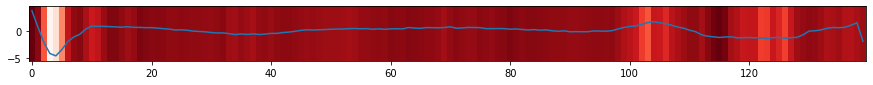

In [12]:
print('Zero occlusion')
plot_relevance(data2explain[0], relevance4data_occl_zero[0]) 
print('Mean occlusion')
plot_relevance(data2explain[0], relevance4data_occl_mean[0])

Rise Mask


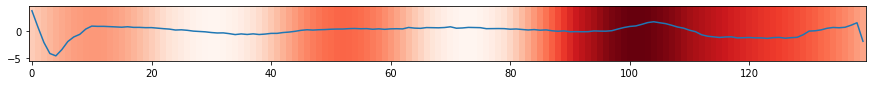

In [13]:
print('Rise Mask')
plot_relevance(data2explain[0], relevance4data_rise_fourier[0]) 